## Student Performance Indicator

### Life Cycle of Machine Learning :

- Understanding Problem Statement

- Data Collection

- Data Checks to perform

- EDA (Exploratory Data Analysis)

- Data Preprocessing

- Model Training

- Choose Best Model


### 1) Problem Statement 
This Project Understands How the student's performance affected by other Variables such as gender, race_ethnicity,parental_level_of_education, lunch, test_preparation_course.
### 2) Data Collection : 
Dataset Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977.

### Importing Pandas, Numpy, Matplotlib,Seaborn and warnings Library

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Import CSV Data as Pandas DataFrame

In [3]:
df = pd.read_csv('data/stud.csv')

### Show Top 5 Records

In [4]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


### Shape of the Dataset

In [5]:
df.shape

(1000, 8)

### Dataset Information

gender : sex of students -> (Male/female)

race/ethnicity : ethnicity of students -> (Group A, B,C, D,E)

parental level of education : parents' final education ->(bachelor's degree,some college,master's degree,associate's degree,high school)

lunch : having lunch before test (standard or free/reduced)

test preparation course : complete or not complete before test

math score

reading score

writing score

## 3) Data Checks to perform

- Check Missing values

- Check Duplicates

- Check data type

- Check the number of unique values of each column

- Check statistics of data set

- Check various categories present in the different categorical column

### Checking Missing Values

In [6]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

There are no missing values in the data set

### Check Duplicates

In [7]:
df.duplicated().sum()

np.int64(0)

There are no duplicate values in the dataset

### Check Datatypes

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


### Check the number of unique values of each column

In [9]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

### Check statistics of data set

In [10]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


### **Insights**

- From above Statistics, mean for math_score, reading_score, writing_score close to each other - between 66 to 68.

- standard Deviation is also close to each other - between 14 to 15.

- Minimum value is 0 for math_score and Maximum Value is 100 for all three.

- Minimum value is 0 in maths whereas writing score minimum is higher by 10 and reading score is 17 minimum.

## 4) Exploring Data 

In [11]:
print("Categories in 'gender' variable :   ", end= " ")
print(df['gender'].unique())

print("Categories in 'race_ethnicity' variable :   ", end= " ")
print(df['race_ethnicity'].unique())

print("Categories in 'parental_level_of_education' variable :   ", end= " ")
print(df['parental_level_of_education'].unique())

print("Categories in 'lunch' variable :   ", end= " ")
print(df['lunch'].unique())

print("Categories in 'test_preparation_course' variable :   ", end= " ")
print(df['test_preparation_course'].unique())

Categories in 'gender' variable :    ['female' 'male']
Categories in 'race_ethnicity' variable :    ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'parental_level_of_education' variable :    ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable :    ['standard' 'free/reduced']
Categories in 'test_preparation_course' variable :    ['none' 'completed']


### Define numerical and categorical features

In [12]:
numerical_features=[feature for feature in df.columns if df[feature].dtype != 'O']
Categorical_features=[feature for feature in df.columns if df[feature].dtype == 'O']

print("Numerical Features are {}".format(numerical_features))
print("Categorical Features are {}".format(Categorical_features))

Numerical Features are ['math_score', 'reading_score', 'writing_score']
Categorical Features are ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


### Adding columns for total score &average score

In [13]:
df['total score'] = df['math_score']+ df['reading_score'] + df['writing_score']
df['average'] = df['total score']/3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [25]:
math_full = df[df['math_score']==100]['math_score'].count()
writing_full = df[df['writing_score']==100]['writing_score'].count()
reading_full = df[df['reading_score']==100]['reading_score'].count()

print(f'Number of students with full marks in Maths : {math_full}')
print(f'Number of students with full marks in Writing : {writing_full}')
print(f'Number of students with full marks in Reading : {reading_full}')

Number of students with full marks in Maths : 7
Number of students with full marks in Writing : 14
Number of students with full marks in Reading : 17


In [26]:
math_less = df[df['math_score']<=20]['math_score'].count()
writing_less = df[df['writing_score']<=20]['writing_score'].count()
reading_less = df[df['reading_score']<=20]['reading_score'].count()

print(f'Number of students with full marks in Maths : {math_less}')
print(f'Number of students with full marks in Writing : {writing_less}')
print(f'Number of students with full marks in Reading : {reading_less}')

Number of students with full marks in Maths : 4
Number of students with full marks in Writing : 3
Number of students with full marks in Reading : 1


### **Insights**

- from above values we get students has performed worst in maths and best in the reading 

### Exploring Data (Visualization)

Visualizing Average score distribution to make some conclusions.

- Histogram
- Kernel Distribution Function (KDE)

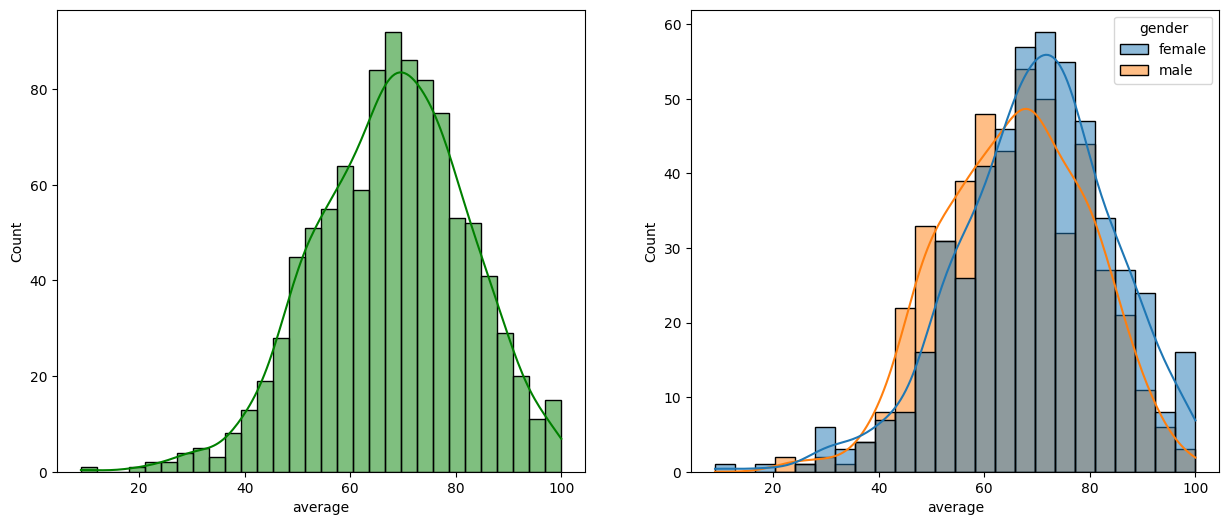

In [31]:
fig, axs = plt.subplots(1,2, figsize=(15,6))
plt.subplot(121)
sns.histplot(data=df,x='average',bins=30,kde= True, color= 'g')
plt.subplot(122)
sns.histplot(data=df,x='average',kde= True, hue= 'gender')
plt.show()

- female students performs well then male students

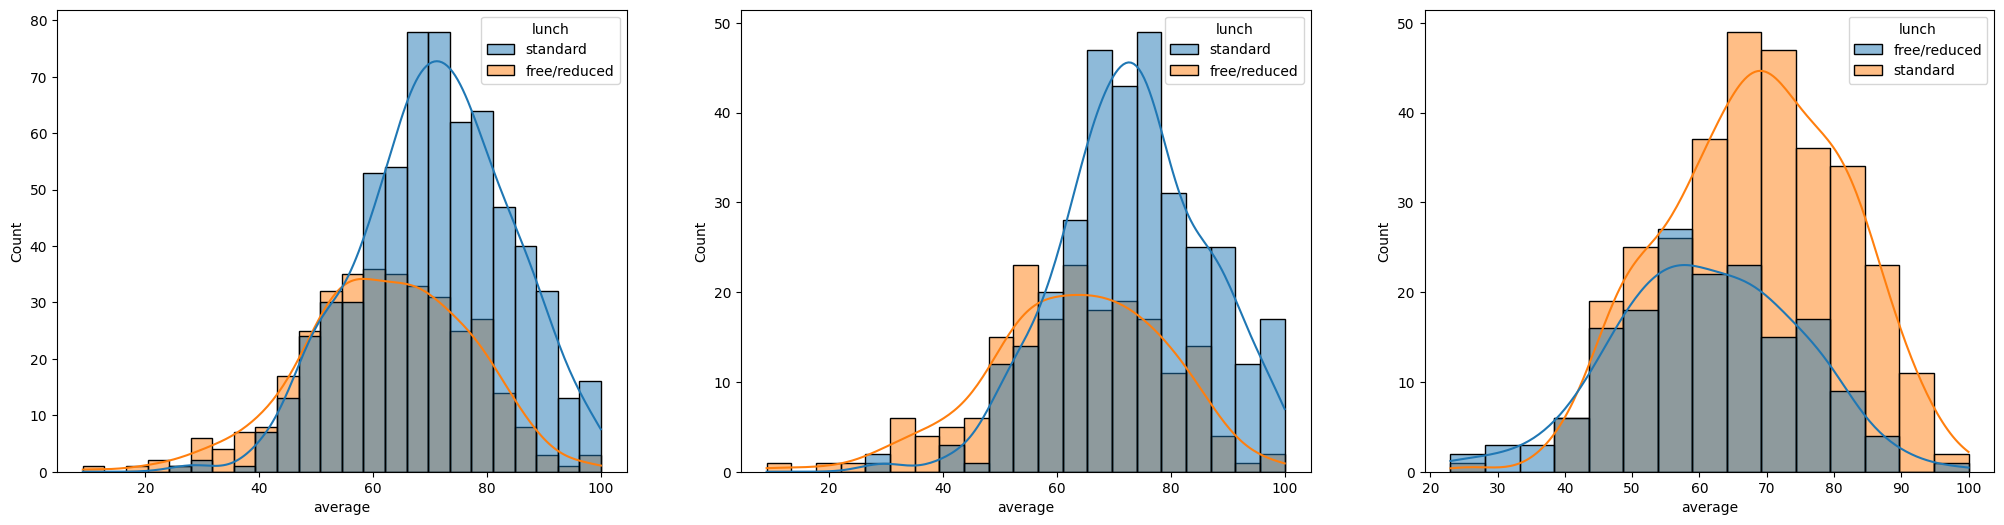

In [40]:
fig, axs = plt.subplots(1,3, figsize=(25,6))
plt.subplot(131)
sns.histplot(data=df,x='average', kde= True, hue='lunch')
plt.subplot(132)
sns.histplot(data=df[df.gender=="female"],x='average',kde= True, hue= 'lunch')
plt.subplot(133)
sns.histplot(data=df[df.gender=="male"],x='average',kde= True, hue= 'lunch')
plt.show()

### **Insights**

- Standard lunch helps to perform well well in exam in general as well as in case of male or female

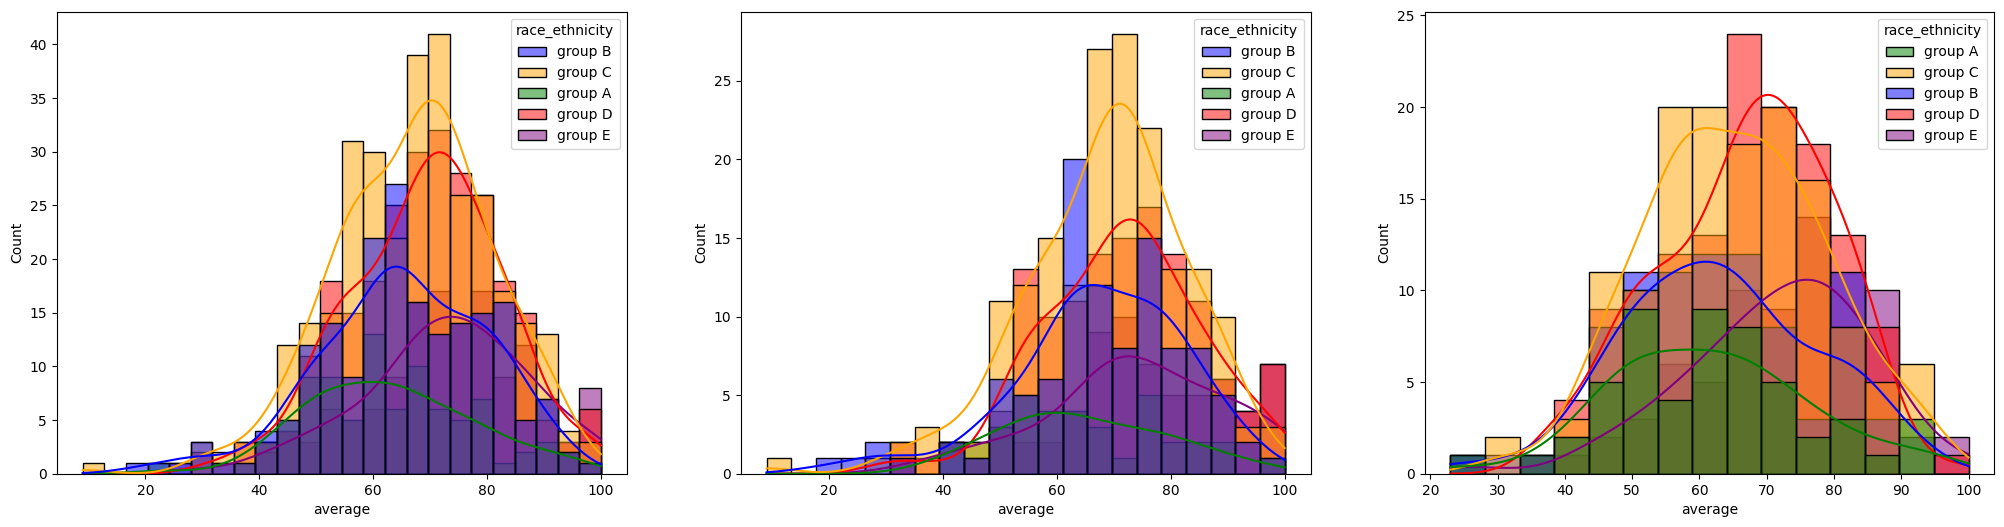

In [44]:
fig, axs = plt.subplots(1,3, figsize=(25,6))

color_dict = {
    'group A': 'green',
    'group B': 'blue',
    'group C': 'orange',
    'group D': 'red',
    'group E': 'purple'
}

plt.subplot(131)
sns.histplot(data=df,x='average', kde= True, hue='race_ethnicity',palette=color_dict)
plt.subplot(132)
sns.histplot(data=df[df.gender=="female"],x='average',kde= True, hue= 'race_ethnicity',palette=color_dict)
plt.subplot(133)
sns.histplot(data=df[df.gender=="male"],x='average',kde= True, hue= 'race_ethnicity',palette=color_dict)
plt.show()

### **Insights**
- Group A and Group B are the lowest performers
- on basis on mode value or in consistent group C scored best most stident are in 70-80 range
- on based on KDE hiher performers are in grop E as its right skewed but the data is widely spread there are lower performers too

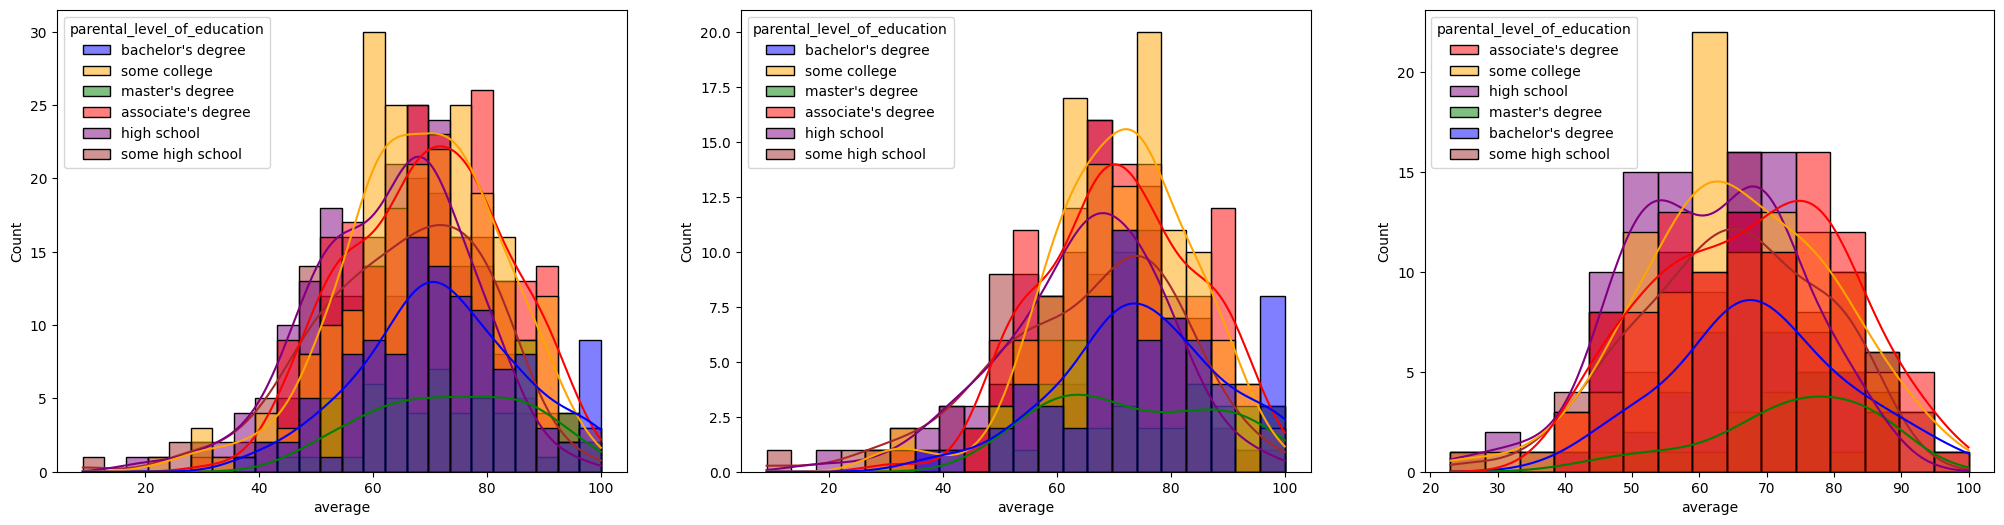

In [51]:
fig, axs = plt.subplots(1,3, figsize=(25,6))

color_dict = {
    "bachelor's degree": 'blue',
    "some college": 'orange',
    "master's degree": 'green',
    "associate's degree": 'red',
    "high school": 'purple',
    "some high school": 'brown'
}

plt.subplot(131)
sns.histplot(data=df,x='average', kde= True, hue='parental_level_of_education', palette=color_dict)
plt.subplot(132)
sns.histplot(data=df[df.gender=="female"],x='average',kde= True, hue= 'parental_level_of_education', palette=color_dict)
plt.subplot(133)
sns.histplot(data=df[df.gender=="male"],x='average',kde= True, hue= 'parental_level_of_education', palette=color_dict)
plt.show()

### **Insights**
- In other cases like in general and in female it doesn't depends on parental_level_of_education
- But, in case of male student whose parent degree is associate or master degree have higher performers 

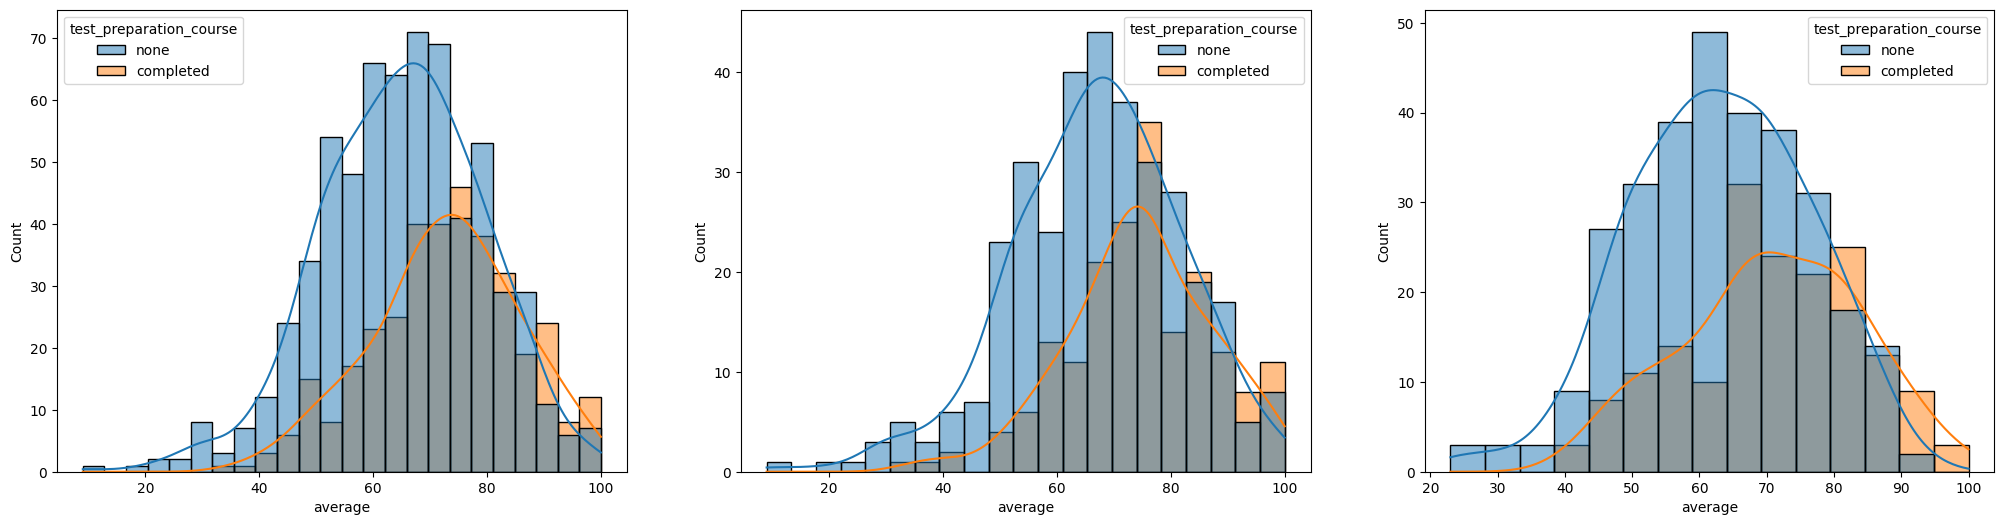

In [53]:
fig, axs = plt.subplots(1,3, figsize=(25,6))


plt.subplot(131)
sns.histplot(data=df,x='average', kde= True, hue='test_preparation_course')
plt.subplot(132)
sns.histplot(data=df[df.gender=="female"],x='average',kde= True, hue= 'test_preparation_course')
plt.subplot(133)
sns.histplot(data=df[df.gender=="male"],x='average',kde= True, hue= 'test_preparation_course')
plt.show()

### **Insights**
- Test prepration course is definetly helping students to score good marks 

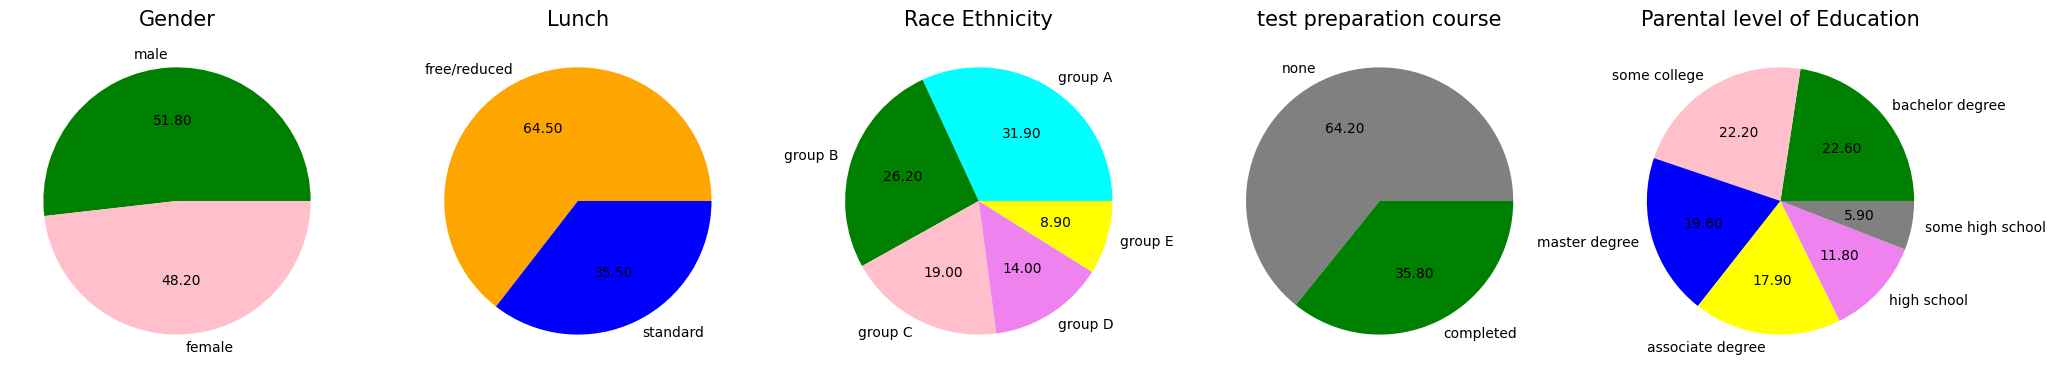

In [57]:
plt.rcParams['figure.figsize']=(25,12)

data =df.copy() 

plt.subplot(151)
size=data['gender'].value_counts()
labels=['male','female']
colors=['green','pink']

plt.pie(size,colors=colors,labels=labels,autopct='%.2f')
plt.title('Gender',fontsize=15)
plt.axis('off')

plt.subplot(152)
size=data['lunch'].value_counts()
labels=['free/reduced','standard']
colors=['orange','blue']

plt.pie(size,colors=colors,labels=labels,autopct='%.2f')
plt.title('Lunch',fontsize=15)
plt.axis('off')

plt.subplot(153)
size=data['race_ethnicity'].value_counts()
labels=['group A','group B','group C','group D','group E']
colors=['cyan','green','pink','violet','yellow']
plt.pie(size,colors=colors,labels=labels,autopct='%.2f')
plt.title('Race Ethnicity',fontsize=15)
plt.axis('off')


plt.subplot(154)
size=data['test_preparation_course'].value_counts()
labels=['none','completed']
colors=['grey','green']
plt.pie(size,colors=colors,labels=labels,autopct='%.2f')
plt.title('test preparation course',fontsize=15)
plt.axis('off')


plt.subplot(155)
size=data['parental_level_of_education'].value_counts()
labels=['bachelor degree','some college','master degree','associate degree','high school','some high school']
colors=['green','pink','blue','yellow','violet','grey']
plt.pie(size,colors=colors,labels=labels,autopct='%.2f')
plt.title('Parental level of Education',fontsize=15)
plt.axis('off')

plt.show()

### **Insights**

- Number of male and female students are equal
- students with free/reduced lunch are more
- Group A & group B Ethincity has more students
- most of the students has not done test prepration course
- most of the students parents went to college or have some degree

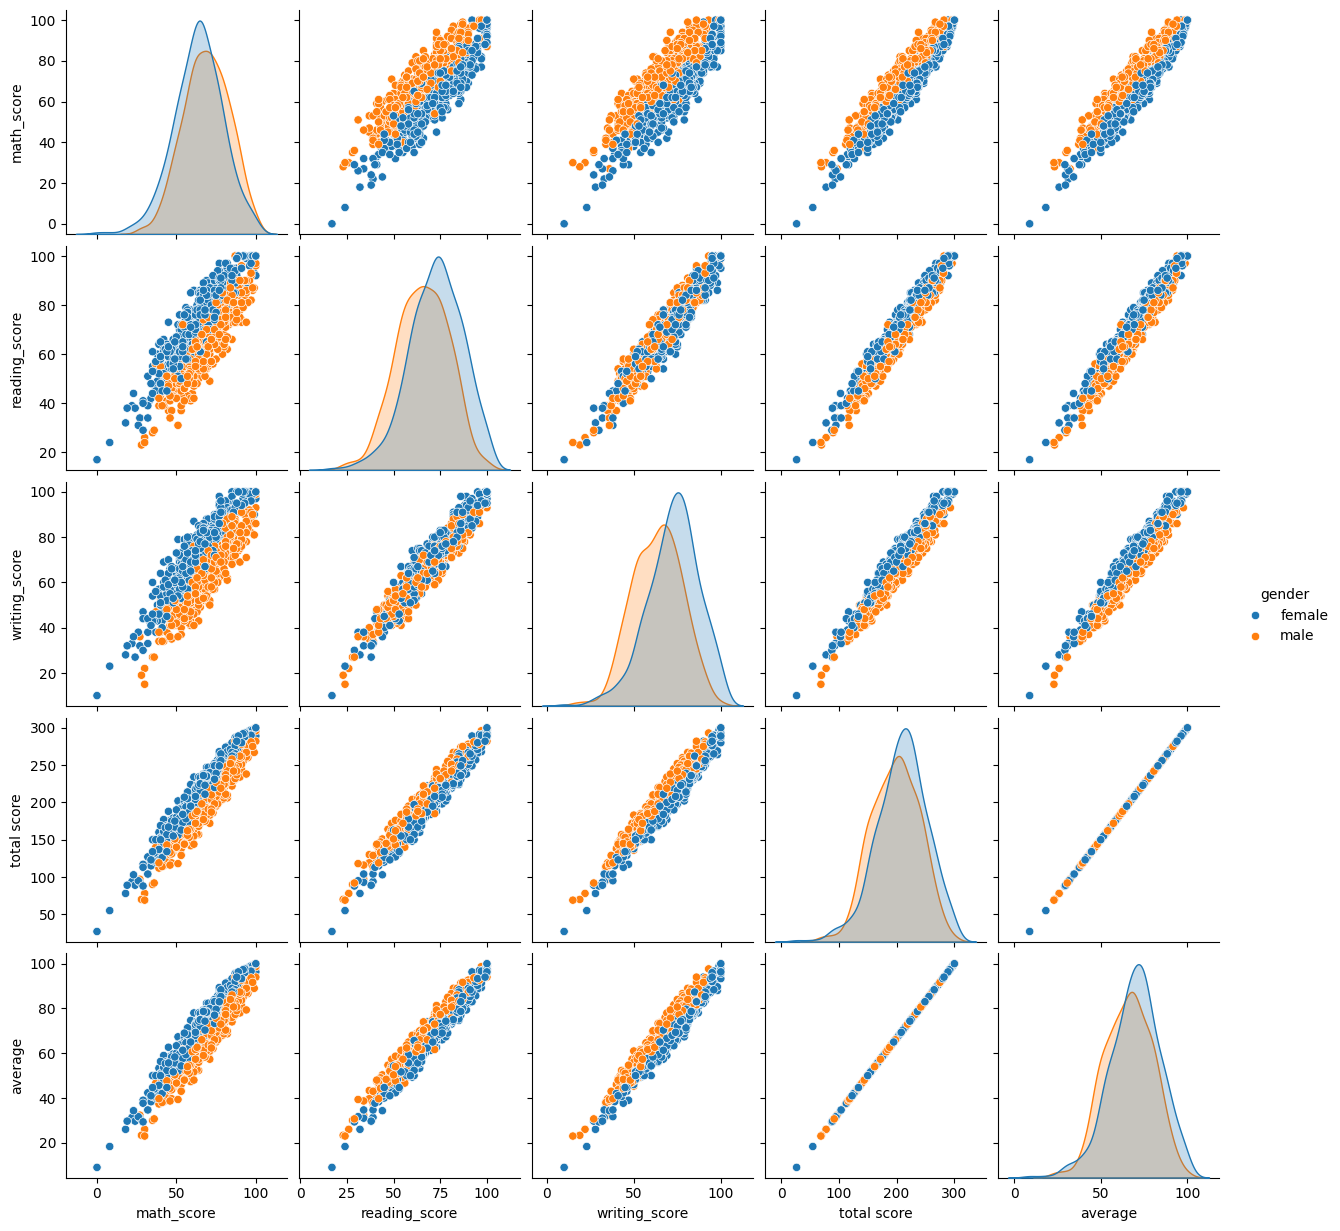

In [58]:
sns.pairplot(df,hue='gender')

### **Insights**
- higher math scores often accompany higher reading and writing scores—suggesting consistent performers across subjects.
